In [376]:
import torch
import gc
import torchvision.models as models
import torch.nn as nn

import dataloader
import trainer
import visualizer

## Main Functions

Auto-reload files imported to the notebook

In [377]:
# import os
# import numpy as np
# import cv2 as cv
# from matplotlib import pyplot as plt
# from PIL import Image
# # img_dir is the directory where the images are located
# # please modify as needed to match the folder structure
# img_dir = '../training_data/color/'
# mask_dir = '../training_data/mask/'
# dep8_dir = '../training_data/depth8/'

# data_filenames = sorted(os.listdir(img_dir))
# mask_filenames = sorted(os.listdir(mask_dir))
# dep8_filenames = sorted(os.listdir(dep8_dir))

# img_paths = [img_dir + p for p in data_filenames if '.jpg' in p]
# mask_paths = [mask_dir + p for p in mask_filenames if '.jpg' in p]
# dep8_paths = [dep8_dir + p for p in dep8_filenames if '.jpg' in p]

# take_idx = np.arange(28000)
# np.random.shuffle(take_idx)

# img_paths = np.take(img_paths, take_idx)
# mask_paths = np.take(mask_paths, take_idx)
# dep8_paths = np.take(dep8_paths, take_idx)

# img_train, mask_train, dep8_train = img_paths[:25000], mask_paths[:25000], dep8_paths[:25000]
# img_val, mask_val, dep8_val = img_paths[25000:26500], mask_paths[25000:26500], dep8_paths[25000:26500]
# img_test, mask_test, dep8_test = img_paths[26500:], mask_paths[26500:], dep8_paths[26500:]

# def threshold_mask(mask, dep8, threshold_val):
#     # remove the far background before thesholding
#     dep8 = np.where(dep8==0, 255, dep8)
#     threshold = cv.threshold(dep8, threshold_val, 255, cv.THRESH_BINARY)[1]
#     # thresholding eliminate 
#     invert = np.where(threshold==255, 0, 255)
#     product = invert * mask
#     # combine the color channels
#     product = np.mean(product, axis=-1)
#     mask = np.mean(mask, axis=-1)
#     # convert to binary labels
#     product = np.where(product == 0, 0, 1)
#     mask_size = len(np.nonzero(mask)[0]) + len(np.nonzero(mask)[1])
#     product_size = len(np.nonzero(product)[0]) + len(np.nonzero(product)[1])
#     ratio = product_size/mask_size
#     return invert, product, ratio, mask_size

# def adaptive_threshold(mask, dep8, init_threshold=100, interval_scale=1, attempts=1):
#     threshold_val = init_threshold
#     invert, product, ratio, mask_size = threshold_mask(mask, dep8, threshold_val)
#     # scale target ratio by mask size, larger the mask, smaller the ratio should be
#     while ratio == 1:
#         threshold_val -= 2*interval_scale
#         invert, product, ratio, mask_size = threshold_mask(mask, dep8, threshold_val)
#     # the ratio boundary here with the scalar are tunable hyperparameters:
#     # larger -- tend to include more area in the final mask, vice versa for smaller
#     while ratio >= 0.50 * (1600/mask_size):
#         threshold_val -= 1*interval_scale
#         invert, product, ratio, mask_size = threshold_mask(mask, dep8, threshold_val)
#     # the ratio boundary here with the scalar are tunable hyperparameters
#     # if the ratio is below this threshold, restart with larger init threshold and smaller step size
#     # increase to reduce cases where the final mask is too small or predominantly background area 
#     if ratio < 0.30 * (1600/mask_size) and attempts < 5:
#         invert, product, ratio, threshold_val = adaptive_threshold(mask, dep8, 200, interval_scale*0.9, attempts+1)
#     print('ratio:', ratio, 'mask_size:', mask_size, 'attempt #', attempts)
#     return invert, product, ratio, threshold_val

img 17119
ratio: 0.9864864864864865 mask_size: 296 attempt # 5
ratio: 0.9864864864864865 mask_size: 296 attempt # 4
ratio: 0.9864864864864865 mask_size: 296 attempt # 3
ratio: 0.9864864864864865 mask_size: 296 attempt # 2
ratio: 0.9864864864864865 mask_size: 296 attempt # 1


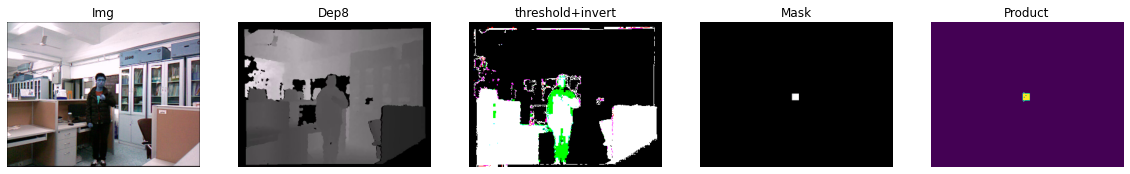

img 2227
ratio: 0.6138461538461538 mask_size: 1300 attempt # 1


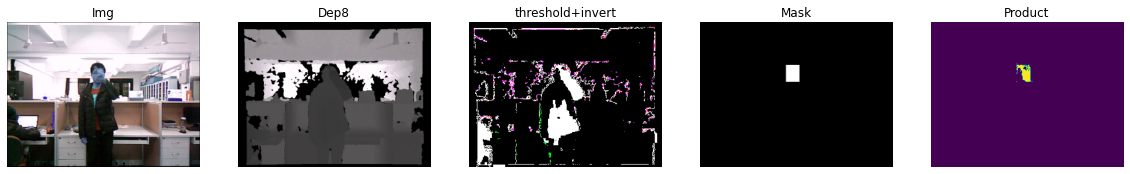

img 20651
ratio: 0.39404761904761904 mask_size: 1680 attempt # 1


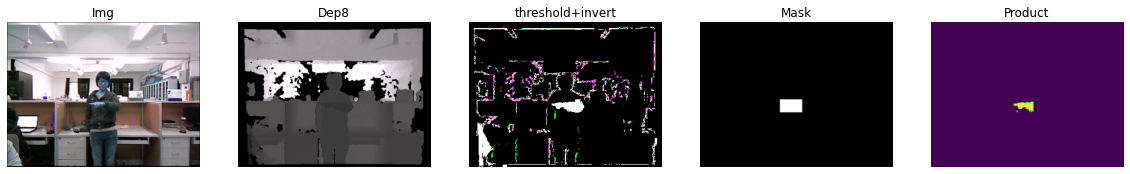

img 10036
ratio: 0.2964071856287425 mask_size: 2672 attempt # 1


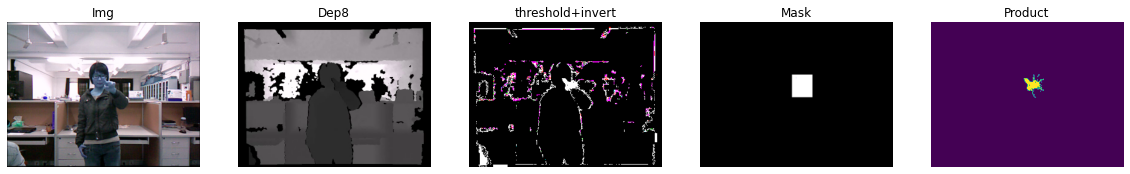

img 24288
ratio: 0.37579617834394907 mask_size: 1570 attempt # 1


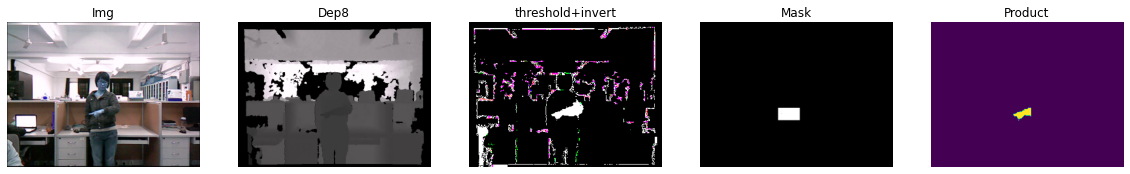

img 13241
ratio: 0.9911504424778761 mask_size: 452 attempt # 5
ratio: 0.9911504424778761 mask_size: 452 attempt # 4
ratio: 0.9911504424778761 mask_size: 452 attempt # 3
ratio: 0.9911504424778761 mask_size: 452 attempt # 2
ratio: 0.9911504424778761 mask_size: 452 attempt # 1


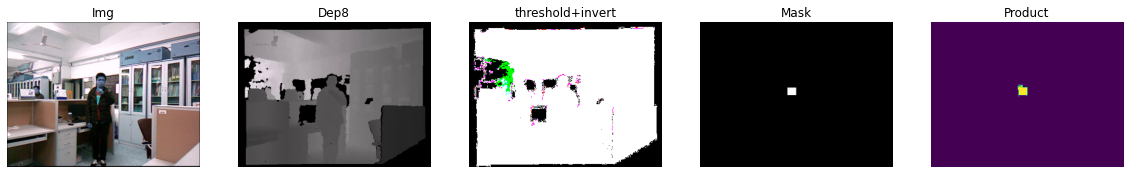

img 10740
ratio: 0.6490066225165563 mask_size: 1208 attempt # 1


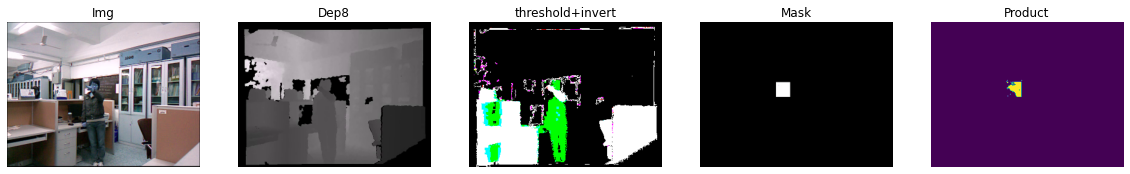

img 17059
ratio: 0.9863013698630136 mask_size: 584 attempt # 1


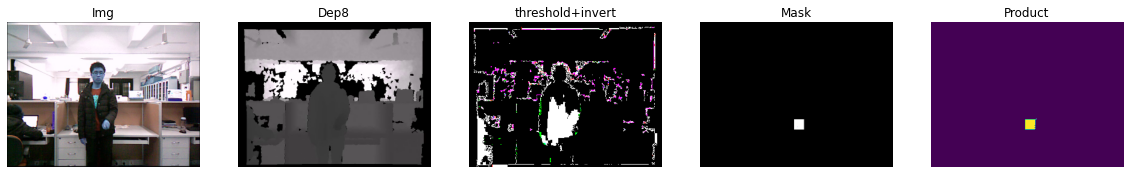

img 5504
ratio: 0.37062256809338523 mask_size: 2056 attempt # 1


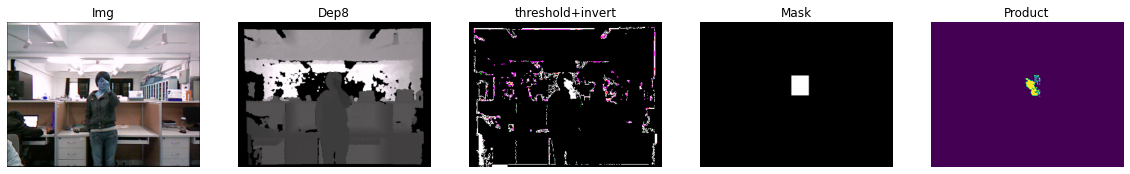

img 7912
ratio: 0.46174142480211083 mask_size: 1516 attempt # 1


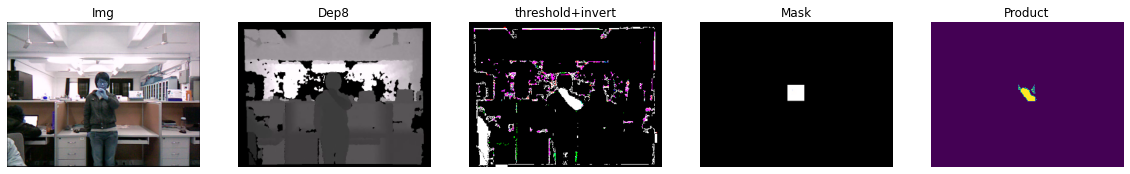

img 19265
ratio: 0.8012684989429175 mask_size: 946 attempt # 1


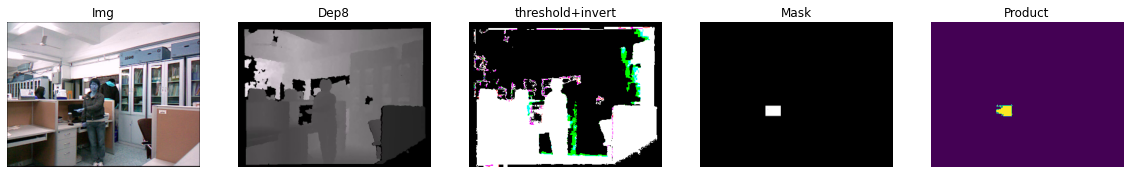

img 3981
ratio: 0.4298941798941799 mask_size: 1512 attempt # 1


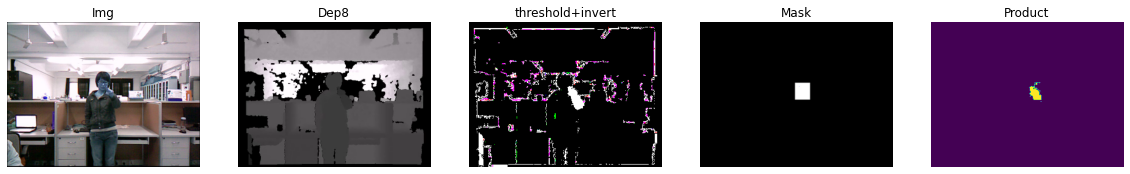

img 5569
ratio: 0.41589861751152074 mask_size: 1736 attempt # 1


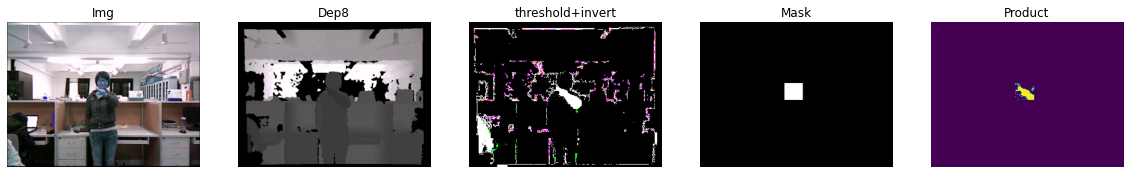

img 21932
ratio: 0.7040998217468806 mask_size: 1122 attempt # 1


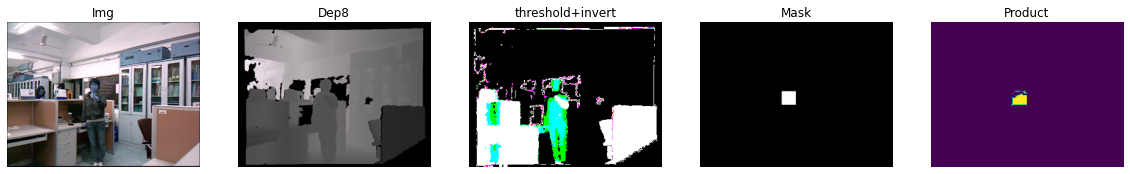

img 18765
ratio: 0.48502994011976047 mask_size: 1336 attempt # 1


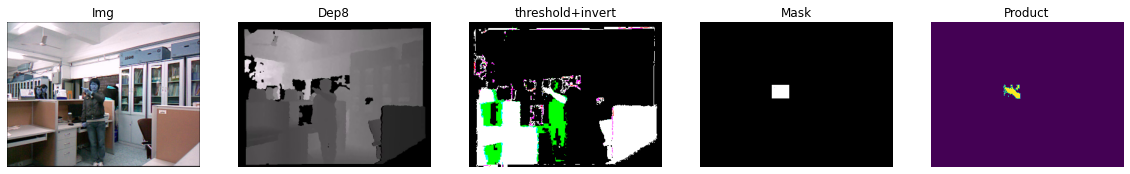

img 3818
ratio: 0.2958199356913183 mask_size: 1866 attempt # 1


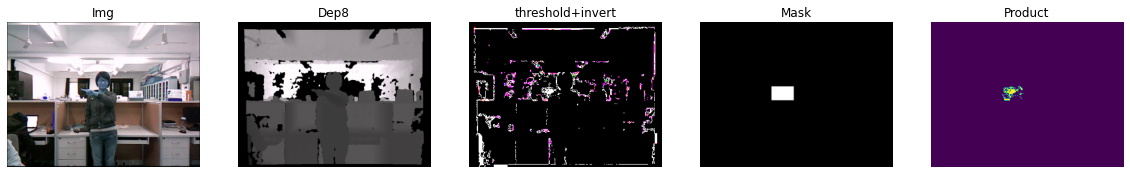

img 22601
ratio: 0.6301369863013698 mask_size: 1168 attempt # 1


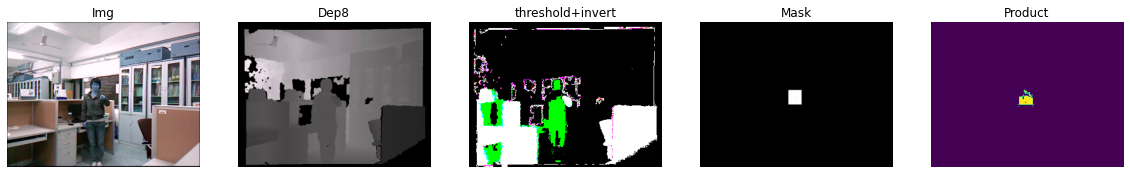

img 15533
ratio: 0.4677804295942721 mask_size: 1676 attempt # 1


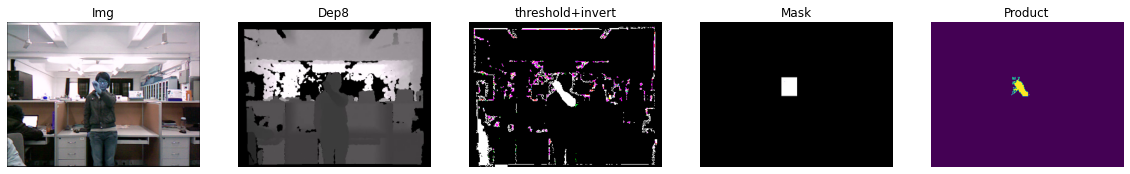

img 9436
ratio: 0.35033259423503327 mask_size: 1804 attempt # 1


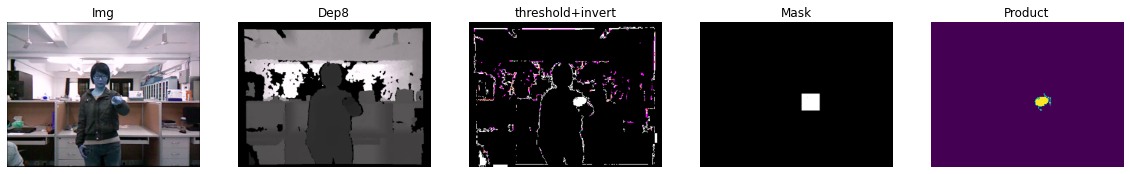

img 11382
ratio: 0.9974619289340102 mask_size: 788 attempt # 1


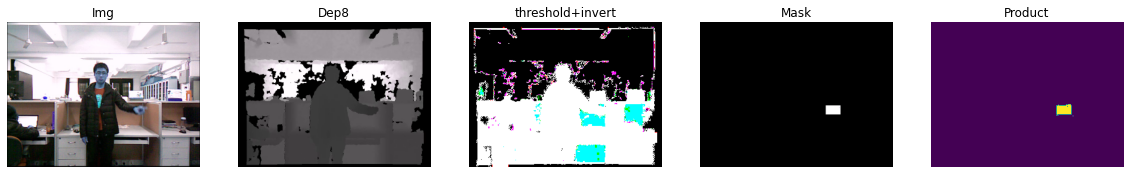

In [371]:
# for i in range(20):
#     figure = plt.figure(figsize=(20, 5))
#     sample_idx = torch.randint(len(img_train), size=(1,)).item()
#     print('img', sample_idx)
#     img, mask, dep8 = img_train[sample_idx], mask_train[sample_idx], dep8_train[sample_idx]
#     img, mask, dep8 = cv.imread(img, 255), cv.imread(mask, 255), cv.imread(dep8, 255)
    
#     threshold_val = 100
#     invert, product, ratio, threshold_val = adaptive_threshold(mask, dep8, init_threshold=threshold_val)
    
#     figure.add_subplot(1, 5, 1)
#     plt.title("Img")
#     plt.axis("off")
#     plt.imshow(img)
#     figure.add_subplot(1, 5, 2)
#     plt.title("Dep8")
#     plt.axis("off")
#     plt.imshow(dep8)
#     figure.add_subplot(1, 5, 3)
#     plt.title("threshold+invert")
#     plt.axis("off")
#     plt.imshow(invert)
#     figure.add_subplot(1, 5, 4)
#     plt.title("Mask")
#     plt.axis("off")
#     plt.imshow(mask)
#     figure.add_subplot(1, 5, 5)
#     plt.title("Product")
#     plt.axis("off")
#     plt.imshow(product)
#     plt.show()

In [373]:
%load_ext autoreload
%autoreload 2

In [374]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device:', device)

Device: cuda


For torch dataloader to use num_workers > 0, it relies on python multiprocessing, which in windows have deadlock issues, unless the instantiation is in a .py module and the code that invokes it is wrapped inside a \__main__ section.
https://github.com/pytorch/pytorch/issues/51344

torch.Size([3, 480, 640]) torch.Size([1, 480, 640])


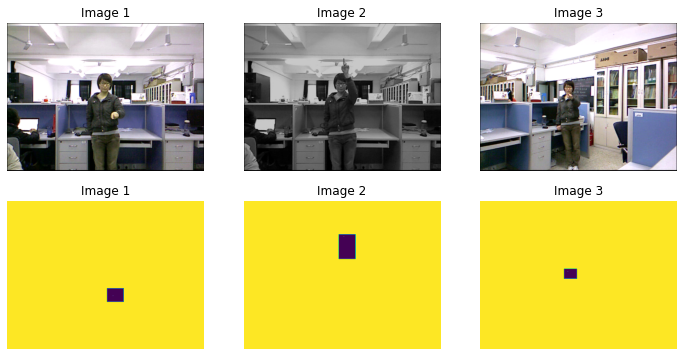

In [375]:
if __name__ == '__main__':
    loader_train, loader_val, loader_test = dataloader.main(batch_size=10, num_workers=3)

In [6]:
x, y = next(iter(loader_val))
print(x.shape, y.shape)

torch.Size([10, 3, 480, 640]) torch.Size([10, 1, 480, 640])


In [7]:
# Free cuda memory
# Reference: https://discuss.pytorch.org/t/how-to-debug-causes-of-gpu-memory-leaks/6741/13
def freemem():
    for obj in gc.get_objects():
        if torch.is_tensor(obj) and torch.is_tensor(obj.data):
            del obj
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    gc.collect()

## Resnet18 Without tiles and utilizing the full dataset

Here we import the resnet18 model with pretrained weights. This gives us some good starting weights so that we don't have to train the model from scratch.

In [8]:
resnet18_notile_full = models.resnet18(pretrained=True)

From there, we replace the last layer to work with the tiles format rather than Resnet's standard classification. Lastly, we freeze all of the layers except for the newly added layer so that it can be trained individually

In [9]:
resnet18_notile_full.fc = nn.Linear(512, 480*640)
print(resnet18_notile_full.fc)

Linear(in_features=512, out_features=307200, bias=True)


##### NOTE: If you want to load the saved model then skip then section and run from the Visualize Model section

In [10]:
for param in resnet18_notile_full.parameters():
    param.require_grad = False
resnet18_notile_full.fc.requires_grad_(True)

Linear(in_features=512, out_features=307200, bias=True)

Now let's train the model!

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device:', device)
resnet18_notile_full = resnet18_notile_full.to(device)
trainer.train(resnet18_notile_full, loader_train, loader_val, lr=1e-4, device=device, num_epochs=100, patience=10)

Device: cuda
Training epoch 1 batch 1250/2500, train loss = 0.049565, train acc = 0.987095, recall = 0.020868, precision = nan544
validation metrics at epoch 1 batch 1250: val loss = 0.025329, val acc = 0.992115, val recall = 0.193928, val precision = 0.736325
Training epoch 1 batch 2500/2500, train loss = 0.034731, train acc = 0.990127, recall = 0.172630, precision = nan
validation metrics at epoch 1 batch 2500: val loss = 0.015300, val acc = 0.994749, val recall = 0.557900, val precision = 0.798022
Epoch 1/100 train loss = 0.034731, train acc = 0.990127, val loss = 0.015300, val acc = 0.994749
Training epoch 2 batch 1250/2500, train loss = 0.014612, train acc = 0.994518, recall = 0.508958, precision = 0.818517
validation metrics at epoch 2 batch 1250: val loss = 0.011257, val acc = 0.995795, val recall = 0.680770, val precision = 0.820084
Training epoch 2 batch 2500/2500, train loss = 0.013042, train acc = 0.995001, recall = 0.565515, precision = 0.828626
validation metrics at epoch 

([0.02532855164259672,
  0.015299901533871889,
  0.011256627651552359,
  0.01010941069573164,
  0.008319161385297775,
  0.007429252291719118,
  0.007231874875724315,
  0.00704046162776649,
  0.00699744512171795,
  0.006767714265733958,
  0.006336792814545333,
  0.006131604497010509,
  0.006159917201536397,
  0.006158836909259359,
  0.006114633864102264,
  0.006268177047992746,
  0.0059370976081117985,
  0.005854630901788672,
  0.005854877733315031,
  0.005694912152054409,
  0.005472287243853013,
  0.005478070036818584,
  0.005436932852802177,
  0.005515199716513356,
  0.005477100922726095,
  0.005356524245192607,
  0.005213700917859872,
  0.0052371876267716284,
  0.005109635869351526,
  0.0054737792676314715,
  0.005101213774954279,
  0.005102251353673637,
  0.005156350255322953,
  0.005147444141718248,
  0.005087267314083874,
  0.00512743567271779,
  0.004951674516002337,
  0.004928737621133526,
  0.004991634300289055,
  0.0049418101273477075,
  0.005087059219367802,
  0.0048544021944

Unfreeze the layers and train with the fully unfrozen model

In [12]:
for param in resnet18_notile_full.parameters():
    param.require_grad = True
trainer.train(resnet18_notile_full, loader_train, loader_val, lr=1e-4, device=device, num_epochs=100, patience=10)

torch.save(resnet18_notile_full.state_dict(), 'saved_models/resnet18_notile_full.model')

Training epoch 1 batch 1250/2500, train loss = 0.003555, train acc = 0.998479, recall = 0.908717, precision = 0.922367
validation metrics at epoch 1 batch 1250: val loss = 0.004829, val acc = 0.997976, val recall = 0.900010, val precision = 0.879550
Training epoch 1 batch 2500/2500, train loss = 0.003574, train acc = 0.998469, recall = 0.908537, precision = 0.921719
validation metrics at epoch 1 batch 2500: val loss = 0.004769, val acc = 0.998004, val recall = 0.902174, val precision = 0.880350
Epoch 1/100 train loss = 0.003574, train acc = 0.998469, val loss = 0.004769, val acc = 0.998004
Training epoch 2 batch 1250/2500, train loss = 0.003449, train acc = 0.998526, recall = 0.911263, precision = 0.924226
validation metrics at epoch 2 batch 1250: val loss = 0.004962, val acc = 0.997933, val recall = 0.908729, val precision = 0.869065
current_patience = 9
Training epoch 2 batch 2500/2500, train loss = 0.003483, train acc = 0.998510, recall = 0.910819, precision = 0.923656
validation me

## Model Visualizations

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device:', device)

Device: cuda


Load the model if you dont want to train it

In [14]:
resnet18_notile_full.load_state_dict(torch.load('saved_models/resnet18_notile_full.model', map_location=torch.device(device)))
resnet18_notile_full = resnet18_notile_full.to(device)

Accuracy = 99.78278279304504%
Precision = 92.98564791679382%
Recall = 86.38489246368408%


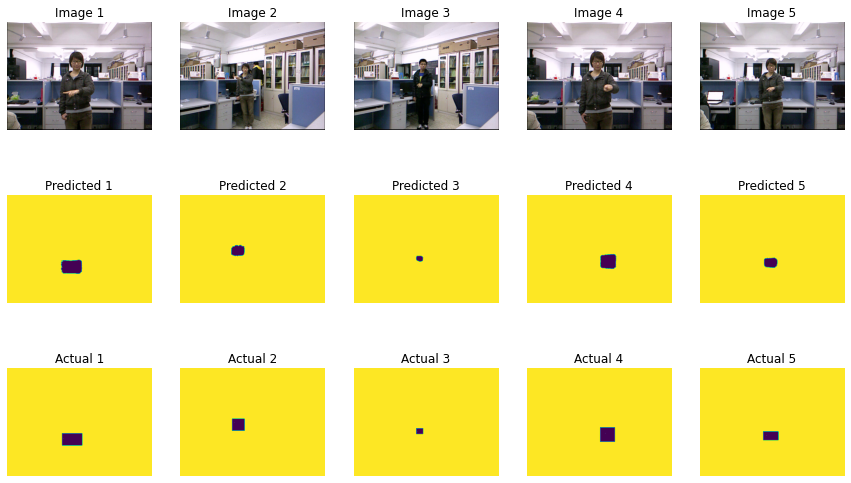

In [15]:
visualizer.visualize_model_output(loader_test, resnet18_notile_full, device=device)